# Simple Neural Network Classification Diabetes Prediction

In [1]:
#importing libraries
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
#importing dataset
df=pd.read_csv('dataset/diabetes_dataset.csv')
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [3]:
#correlation
corr=df.corr()


<Axes: >

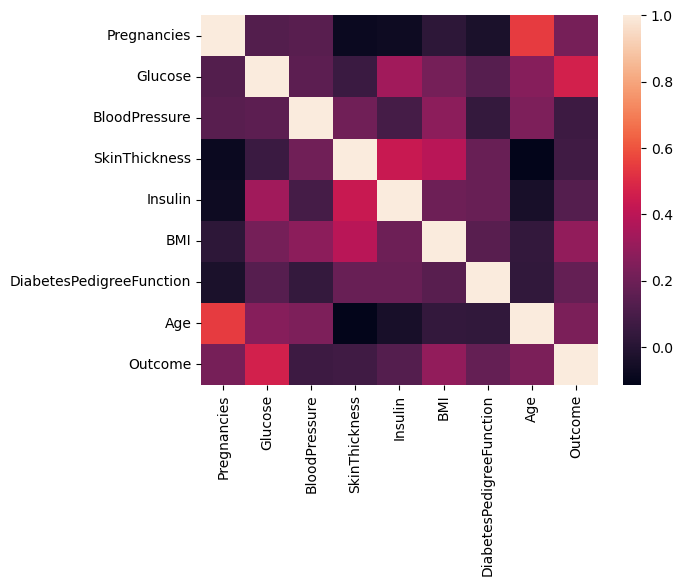

In [4]:
#visualize the correlation using heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [5]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [8]:
# What is the mistake in the below code
model = keras.Sequential([
    layers.Dense(40, activation='relu', input_shape=(8,)),
    layers.Dense(20,activation="relu"),
    layers.Dense(15,activation="relu"),
    layers.Dense(10, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


c:\Users\Yugesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_test_scaled, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5437 - loss: 0.6931 - val_accuracy: 0.6429 - val_loss: 0.6477
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6591 - loss: 0.6330 - val_accuracy: 0.6429 - val_loss: 0.6053
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.5942 - val_accuracy: 0.6818 - val_loss: 0.5657
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.5517 - val_accuracy: 0.7727 - val_loss: 0.5211
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7633 - loss: 0.5011 - val_accuracy: 0.8052 - val_loss: 0.4920
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.5037 - val_accuracy: 0.7987 - val_loss: 0.4810
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7713 - loss: 0.4719 - val_accuracy: 0.7857 - val_loss: 0.4828
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7775 - loss: 0.4468 - val_accuracy: 0.7792 - 

In [11]:
#prediction
y_pred = (model.predict(x_test_scaled) > 0.5).astype('int32')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [12]:
#find accuracy value
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 67.53%


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
df.query('Pregnancies == 4.0 and Glucose == 145.0')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
666,4,145,82,18,0,32.5,0.235,70,1


In [ ]:
df.iloc[666].to_numpy()

array([  4.   , 145.   ,  82.   ,  18.   ,   0.   ,  32.5  ,   0.235,
        70.   ,   1.   ])

In [15]:
# test with a sample data
sample_data = [[4.,145.,82.,18.,0.,32.5,0.235,70.]]
sample_data_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_data_scaled)
print("Prediction:", (prediction>0.5).astype('int32')[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 1


c:\Users\Yugesh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
